### Gregory Bodik (gnb23) and Brian Bobby (btb68)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Background
The dataset we chose comes from spotify and cosists of their top 100 tracks for the year 2018. For each song it includes data on common musical characterestistics like the tempo, key, or mode (major or minor), and also more uncommon features quantified by spotify like speechiness, valence (how happy a song is/musical positiveness), or acousticness. In visualizing and analyzing this dataset, we wanted to try to appraoch the question: What features define or are common to the top musical tracks of 2018? We hoped to answer this question by looking at features like the songs' duration, and aspects of the emotion and mood of the songs as shown in the analysis below. 
The dataset can be found at: https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018

# Data Processing
## Replace NaN Values with the mean of the column
If the data contained NaN values, we would replace them with the mean for that particular column with the code as shown below. This data comes from spotify and is applicable to all the songs in the dataset, so there are no NaN values. 

In [2]:
#this would replace NaN values in a column with the mean of the other values in the column. 
#read the csv file and put it into a data frame
tracks = pd.read_csv('top2018.csv')
df = pd.DataFrame(tracks)
df.mean()
df.fillna(df.mean())
df.head(3)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0


# Data Manipulation
## We will convert the existing song durations in miliseconds to minutes so they are easier to visualize
We will add a new column for song durations in seconds

In [3]:
tracks['duration_min']=tracks['duration_ms']/60000

# Histogram of song durations in minutes

Text(0,0.5,'Frequency')

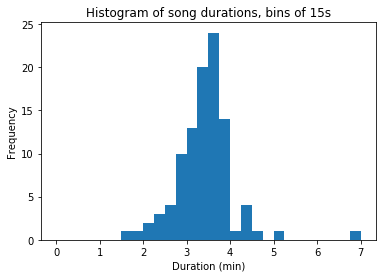

In [4]:
mins = tracks['duration_min']
bins1 = []
for n in range(0,725,25):
    bins1.append(n/100.0)
plt.hist(mins,bins = bins1,range=(0,7))
plt.title('Histogram of song durations, bins of 15s')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')

# Analysis
When converted to minutes and ploted on a histogram, the distribution of song durations for this dataset can be more easily visualized to answer the question of how long are 2018's most popular songs? Based on the histogram, which shows the frequency of songs within 15 second ranges, songs lasting between 3:00 and 3:45 are most common, with a majority of songs lasting from 2:45 to 4:00. This could indicate an optimal duration where listeneres do not become bored of a song (after about 4 minutes), but also have time to become interested (after about 2 minutes 45 seconds). 

# Bar graph of song valence by mode

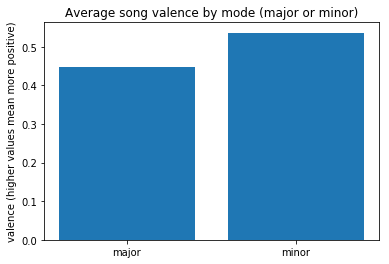

In [5]:
major_sum = 0
minor_sum = 0
num_major = 0
num_minor = 0
for x in range(0,len(df)):
    if df['mode'][x]==1:
        major_sum += df['valence'][x]
        num_major += 1
    else:
        minor_sum += df['valence'][x]
        num_minor += 1
major_mean = major_sum/num_major
minor_mean = minor_sum/num_minor
bar1 = major_mean
bar2 = minor_mean
plt.bar([0,1],[bar1,bar2],align='center')
plt.title('Average song valence by mode (major or minor)')
plt.xticks([0,1],['major', 'minor'])
plt.ylabel('valence (higher values mean more positive)')
plt.show()

# Analysis
We used a bar graph to compare the average valence (a measure of how happy a song is) between songs in a major key and songs in a minor key. We found that contrary to what would be expected, in this 100 song sample, songs in the minor mode had a higher average valance, meaning they were happier feeling than those in the major key. This may inidicate that for at least the modern songs in the dataset, the perceieved happiness of a song is not determined by its key but perhaps by other factors like a fast tempo, or many lyrics and varied sounds. 

# Violin plot of danceability and energy

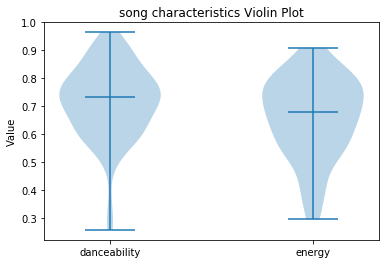

In [6]:
plt.violinplot([tracks['danceability'],tracks['energy']],showextrema=True,showmedians=True)

plt.title('song characteristics Violin Plot')
plt.xticks([1,2],['danceability','energy'])
plt.ylabel('Value')

plt.show()

# Analysis
We used the violin plot above to investiage the spread of danceability and energy values in the dataset. For both variables, a value of 0 indicated a lower level of danceability or energy, and a value of 1 indicates the highest possible danceability and energy. We thought that the data would be centered closer to 1 than to 0 for both of these measures gieven the upbeat nature of today's popular music. This is confirmed in the visualization. We also thought that the two plots would be very similar due to the related nature of danceability and energy. As seen in the plot this is somewhat true, but a greater amount of the songs had very high danceability measures, whereas the majority of songs had slightly lower energy values. As a whole, the violin plot shows that most of the songs in the dataset have high danceability values between approximately 0.6 and 0.9. Energy values are centered at a slightly lower level, with the majority of songs falling approximately between 0.5 and 0.8 and a greater amount of songs with lower eneger values compared to very few songs having low danceability values. 

# Summary
Our visualizations aided us in determining some of the common qualities of 2018's top spotify songs. The historgram of song durations shows that most songs fall in a range of 2:45 to 4:00 minutes in length. The bar graph of average valence by mode disproves the idea that songs in a major mode are always happier and indicates that other factors are involved in a song's perceived level of happiness. Looking at violin plots of energy and danceability also reflects current trends towards higher energy, fast-paced songs, and people's desire to dance. 